# <h1><center>Course: Introduction to Machine Learning</center></h1>
# <h1><center>Assigment 2</center></h1>
### <h1><center>Important NOTE: In order to get full credit, for every question, you need to provide the details of your work on how you arrived at your solution.</center></h1>
### <h1><center>Instructor: Tan Bui-Thanh</center></h1>
### <h1><center>TA: Cole Nockolds</center></h1>
#### <h1><center>Due day: 11:00 pm, Monday, 30, September, 2024 </center></h1>
### If you use this jupyter notebook for the assignment, please convert to .pdf file for submission. For other options, all submission MUST be in pdf format, except codes.

## **Question 1** (Linear regression + regularization techniques + data augmentation) (60 points)

In this problem, we approximate the polynomial from noisy data points. To that end, we generate a data pair $(x^{(i)}, y^{(i)})$ from the following noise-corrupted relation  
$$
f(x^{(i)}) = 0.5 - {x^{(i)}} - 0.5 [{x^{(i)}}]^2 - 2 [{x^{(i)}}]^3 + 5 [{x^{(i)}}]^4
$$
$$ y^{(i)} = f(x^{(i)}) + \delta \varphi^{(i)} f(x^{(i)})$$
of the following  ground truth function
$$ y = 0.5 - {x} - 0.5 {x}^2 - 2 {x}^3 + 5 {x}^4$$

where $\delta = 0.05$ is the noise level, $\varphi^{(i)}$ is drawn from standard normal distribution (given in the pseudo-code). We need to generate 8 holdout samples and 7 training samples.

- (1.a) (+10) Fill the generating data code and produce figures to visualize data and true functions.
- (1.b) (+10) Perform the LinearRegression() using polynomial approximation of order of 1, 10 and 4. Visualizing each cases to see which case are overfitting, underfitting, and fitting well. Present the mean square error of the holdout data to support your observation.
- (1.c) (+10) For the overfitting senario, apply L2 regularization. You need to do: 
    + step 1: Plot the L2 regularization model, no regularization model, and the ground truth function in one plot to see how L2 impacts the fit (pick a reasonable $\lambda$).
    + step 2: Plot the mean square error of holdout data as a function of the regularization parameter $\lambda$ over the range $\lambda \in [10^{-5},10]$. What is the optimal $\lambda$ approximately? 
    + step 3: Using L-curved technique (read [https://www.sintef.no/globalassets/project/evitameeting/2005/lcurve.pdf]) to find out the optimal $\lambda$. The L-curved line is the one represents the relationship between residual norm $||y - f(x,\boldsymbol{\theta})||_2$ and solution norm $||\boldsymbol{\theta}||_2$. Plot the L-curve and compare the optimal values of $\lambda$ from step 2 and step 3?
- (1.d) (+10) For the overfitting senario, apply L1 regularization. Repeat the all 3 steps in the question (1.c).
- (1.e) (+10) For the overfitting senario, apply Elasticnet regularization (a mixture of L1 and L2), i.e., the loss function with Elasticnet regularization is 
$$ J(\boldsymbol{\theta}) = \frac{1}{n} \sum_{i=1}^n L(y^{(i)}, \boldsymbol{\theta}^\top \boldsymbol{\Phi}(x^{(i)})) + \lambda \cdot ||\boldsymbol{\theta}||_1 + \frac{1}{2} \gamma ||\boldsymbol{\theta}||_2^2$$

We are interested in the performance of the mean square error of the holdout data as a function of $\lambda$ and $\gamma$. One way to visualize this is to plot the contour of the mean square error of the holdout data as a function of $\lambda$ and $\gamma$. Plot the contour and discuss the relationship between Elasticnet and L2, L1 regularization?

- (1.g) (+10) **Can we do something else** and yet achieve the same regularization effect? One way to accomplish this is via **data augmentation techniques**. The data augmentation technique that we will attempt consists of 4 steps:
    + step 1: Clone 7 training data samples (X in the code) into 350 samples (using numpy.repeat). (Note: this is noise-free data).
    + step 2: We add noise to these 350 samples by $$\tilde{x}^i = x^i + \delta \varphi^i,$$ where $\varphi^i$ is drawn from standard normal distribution. This is our augmented data, called X_data_augmented.
    + step 3: Similarly, clone the 7 training labels data, corresponding to the cloned X data, into 350 samples (using numpy.repeat), denoted y_data_augmented. 
    + step 4: Now, we have (X_data_augmented, y_data_augmented) pairs. Use LinearRegression to train the model from these augmented data pairs.

    You need to (1) generate augmented data, (2) Determine a good noise level $\delta$ by trying different values of $\delta$? Explain why too much or too small noise is not good? To answer the last question, you may need to read the folllowing references
    1. Train Neural Networks With Noise to Reduce Overfitting, [https://machinelearningmastery.com/train-neural-networks-with-noise-to-reduce-overfitting/]
    2. [https://arxiv.org/abs/2208.04995]

## Question 1a


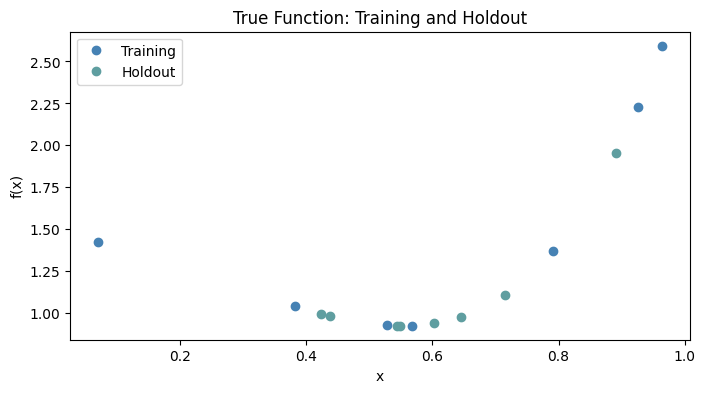

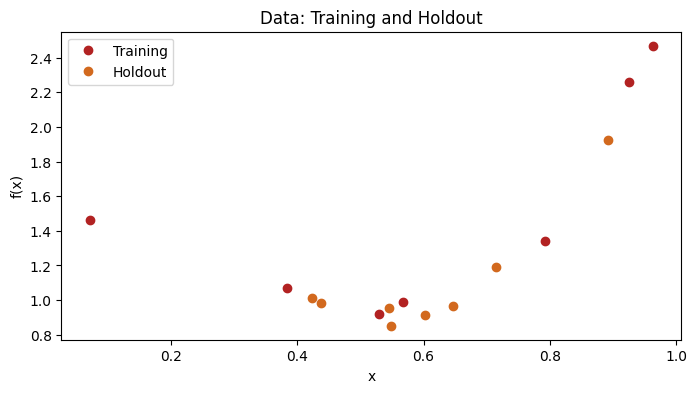

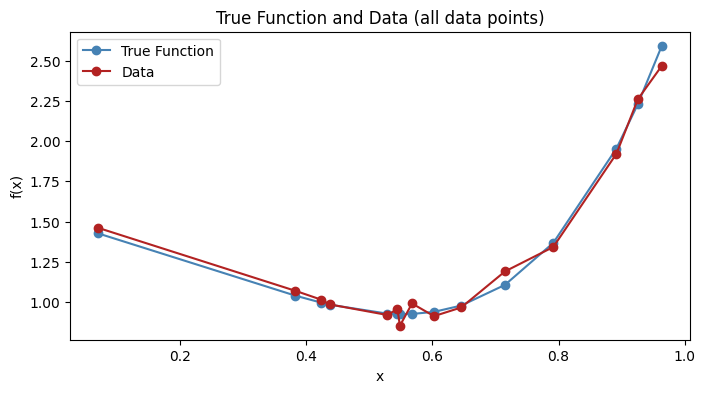

In [499]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 4]

import pandas as pd
from sklearn import datasets
np.random.seed(0)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso, LogisticRegression

## please keep the below codes for generating x, DO NOT CHANGE!

order_true = 5
true_coefficient = np.array([.5, -1, -.5, -2, 5])

def true_fn(X):
    f = np.ones((X.shape))
    for i in range(order_true):
        f += true_coefficient[i] * X**i
    return f

# ==========================================================================================
# holdout samples
n_holdout_samples = 8
X_holdout = np.sort(np.random.rand(n_holdout_samples)) 

# Training samples
n_samples = 7
X_train = np.sort(np.random.rand(n_samples)) 
# ==========================================================================================

# [CONTINUE YOUR WORK FROM HERE!]

# 1a
from matplotlib import pyplot as plt
delta = 0.05

phi_train = np.random.randn(n_samples)
phi_holdout = np.random.randn(n_holdout_samples)

y_train_data = true_fn(X_train) * (1+delta*phi_train)
y_train_true = true_fn(X_train)

y_holdout_data = true_fn(X_holdout) * (1+delta*phi_holdout)
y_holdout_true = true_fn(X_holdout)

plt.clf()
plt.plot(X_train, y_train_true,"o", color = "steelblue", label = "Training")
plt.plot(X_holdout, y_holdout_true,"o", color = "cadetblue", label = "Holdout")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("True Function: Training and Holdout")
plt.legend()
plt.show()

plt.plot(X_train, y_train_data,"o", color = "firebrick", label = "Training")
plt.plot(X_holdout, y_holdout_data,"o", color = "chocolate", label = "Holdout")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Data: Training and Holdout")
plt.legend()
plt.show()


def datastack(x1, x2, y1, y2):
    X_combined = np.hstack((x1, x2))
    y_combined = np.hstack((y1, y2))

    # Stack the X and y arrays vertically so that each X corresponds to its y
    combined_data = np.vstack((X_combined, y_combined)).T

    # Sort the combined data by the X values (first column)
    sorted_data = combined_data[np.argsort(combined_data[:, 0])]

    # Separate X and y back into individual arrays
    X_sorted = sorted_data[:, 0]
    y_sorted = sorted_data[:, 1]
    return X_sorted, y_sorted
trdata = datastack(X_train, X_holdout, y_train_true, y_holdout_true)
ddata = datastack(X_train, X_holdout, y_train_data, y_holdout_data)
plt.plot(trdata[0], trdata[1],"o-", color = "steelblue", label = "True Function")
plt.plot(ddata[0], ddata[1],"o-", color = "firebrick", label = "Data")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("True Function and Data (all data points)")
plt.legend()
plt.show()

## Question 1b



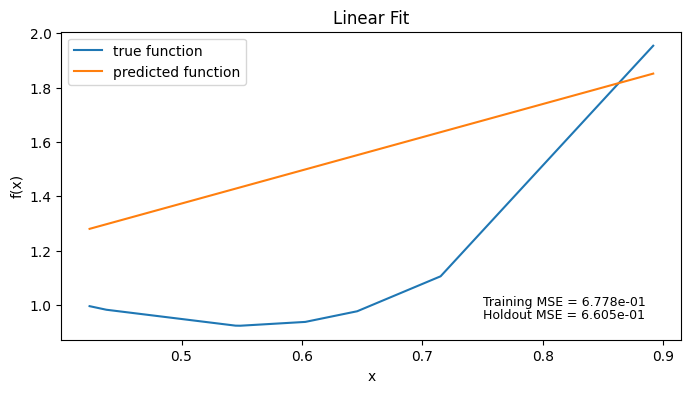

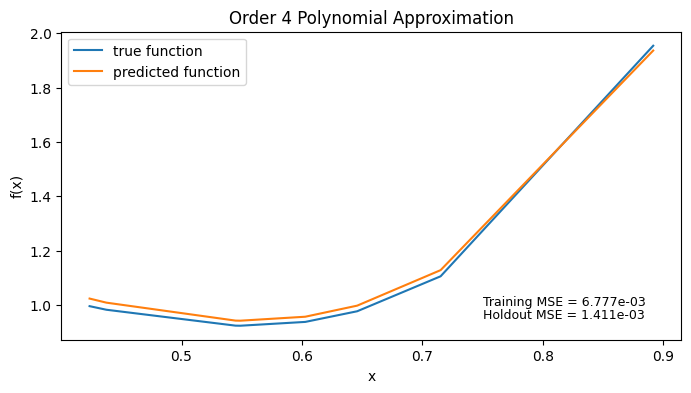

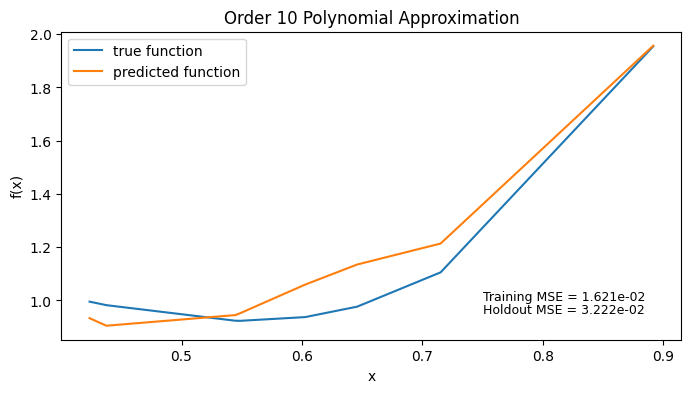

In [500]:
# 1b 
def plotregression( y_train_pred,y_holdout_pred, title):
    plt.clf()
    plt.plot(X_holdout,y_holdout_true,label = "true function")
    plt.plot(X_holdout,y_holdout_pred,label = "predicted function")
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    mse = "{:.3e}".format(np.linalg.norm((y_holdout_pred - y_holdout_true)**2))
    plt.text(.75,.95,f"Holdout MSE = {mse}", fontsize = 9)
    mse = "{:.3e}".format(np.linalg.norm((y_train_pred - y_train_true)**2))
    plt.text(.75,1,f"Training MSE = {mse}", fontsize = 9)

    plt.show()
# # Create linear regression object
regr = LinearRegression()

regr.fit(X_train.reshape(X_train.shape[0], 1),y_train_data)

# Make predictions on the training set
diabetes_y_train_pred = regr.predict(X_train[:,np.newaxis])
diabetes_y_hold_pred = regr.predict(X_holdout[:,np.newaxis])
plotregression( diabetes_y_train_pred, diabetes_y_hold_pred, "Linear Fit")

def perfpower(n):
    poly = PolynomialFeatures(degree=n)
    X_train_poly = poly.fit_transform(X_train[:,np.newaxis])
    X_holdout_poly = poly.transform(X_holdout[:,np.newaxis])

    regr = LinearRegression()
    regr.fit(X_train_poly, y_train_data)

    y_train_pred = regr.predict(X_train_poly)
    y_holdout_pred = regr.predict(X_holdout_poly)
    return y_train_pred,y_holdout_pred

# Plot the results


q = perfpower(4)
t = perfpower(10)
plotregression(q[0],q[1], "Order 4 Polynomial Approximation")
plotregression(t[0], t[1], "Order 10 Polynomial Approximation")

A linear (order 1) polynomial fit results in underfitting. The training MSE is large ($6.8*10^{-1}$), as is the holdout MSE ($6.6*10^{-1}$). The model does not capture the relationship between the input and outputs of the data. 

An order 4 polynomial leads to the best fitting. This model has the least MSE for both the training ($6.77*10^{-3}$) and holdout data ($1.41*10^{-3}$) (in comparision with the other polynomial fittings). This means that the model not only fits well with the given data but can also generalize well (the more important aspect). The model has determined an accurate relationship between the input and output of the function. Also note that the magnitude of the holdout MSE is on the same order as the training MSE; in fact, the holdout MSE is smaller than the training MSE, which means that the model certainly can generalize/predict to new data.

An order 10 polynomial fit results in overfitting. The training MSE is relatively smaller (than the linear fit) ($1.62*10^{-2}$) but the holdout MSE is larger than the training MSE at $3.22*10^{-2}$. Note that a higher holdout MSE (than training MSE) is indicative of overfitting. Howevver, in this scenario, the holdout MSE is not extremely large (orders of magnitude larger) compared with the training MSE. So, we cannot use just this informatiion to conclude that the order 10 polynomial overfits the data. Also note, however, that the holdout MSE (the assumed measure of the model's accuracy toward prediction on new data) is larger than the holdout MSE for a model with order 4 polynomial. So, we know that the order 4 polynomial is a better fit; a higher order polynomial (than 4) leads toa  too rich/complicated model. Thus, the order 10 polynomial is infact overfitting to the data. 


## Question 1c


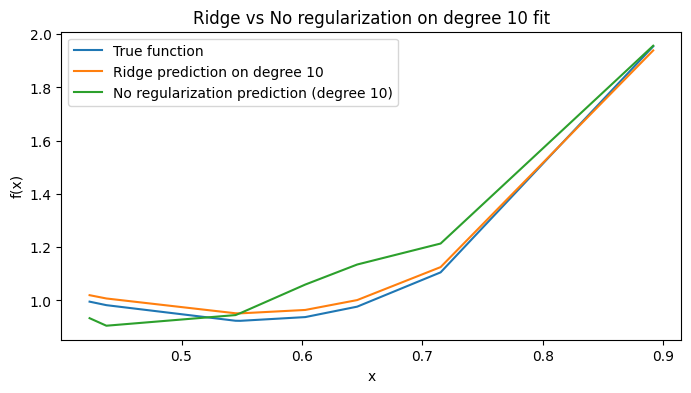

In [501]:
#1c, part 1
def ridge(degree, alpha):
    ridge_model = Pipeline([('poly_features', PolynomialFeatures(degree=degree)),('ridge_regression', Ridge(alpha=alpha))])
    return ridge_model.fit(X_train.reshape(X_train.shape[0], 1), y_train_data)
degree = 10
alpha = 0.001
plt.plot(X_holdout,y_holdout_true, label = "True function")
plt.plot(X_holdout,ridge(degree, alpha).predict(X_holdout.reshape(X_holdout.shape[0], 1)), label = "Ridge prediction on degree 10")
plt.plot(X_holdout,t[1], label = "No regularization prediction (degree 10)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Ridge vs No regularization on degree 10 fit")
plt.legend()


For the above plot, the L2 regularization coefficient, $\lambda = 10^{-3}$.



Optimal Lambda = 0.0010100990099009902


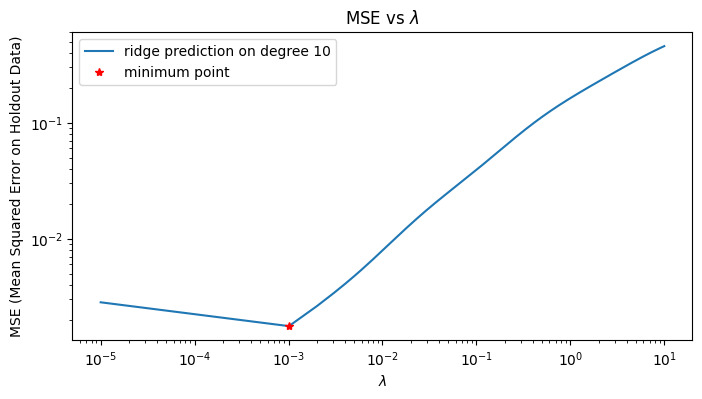

In [502]:
#1c, part 2
def mseas(alphas):
    mseas = []
    for alpha in alphas:
        ridge_y = ridge(degree, alpha).predict(X_holdout.reshape(X_holdout.shape[0], 1))
        mse = np.linalg.norm((ridge_y - y_holdout_true)**2)
        mseas.append(mse)  # Keep mse as float for correct plotting
    return mseas

def plot_mseas(alphas):
    plt.clf()
    plt.plot(alphas, mseas(alphas), label="ridge prediction on degree 10")
    plt.xlabel(r"$\lambda$")
    plt.ylabel("MSE (Mean Squared Error on Holdout Data)")
    plt.yticks(np.linspace(10**-5, 10, 11))
    plt.xscale('log')  
    plt.yscale('log')  
    plt.title(r"MSE vs $\lambda$")
    plt.legend()
    # plt.show()

alphas = np.linspace(10**-5, 10**1, 10**4)
plot_mseas(alphas)

# Function to create ridge regression model
def ridge(degree, alpha):
    ridge_model = Pipeline([
        ('poly_features', PolynomialFeatures(degree=degree)),
        ('ridge_regression', Ridge(alpha=alpha))
    ])
    return ridge_model.fit(X_train.reshape(X_train.shape[0], 1), y_train_data)

# Find the minimum MSE prediction
degree = 10
minind = pd.Series(mseas(alphas)).idxmin()
print(f"Optimal Lambda = {alphas[minind]}")
y_ridge_min = ridge(degree, alphas[minind]).predict(X_holdout.reshape(X_holdout.shape[0], 1))
mse = np.linalg.norm((y_holdout_true - y_ridge_min)**2)
plt.plot(alphas[minind], mse, "r*", label="minimum point")
plt.legend()
plt.show()


The optimal $\lambda$ is approximately $1.01 \times 10^{-3}$.


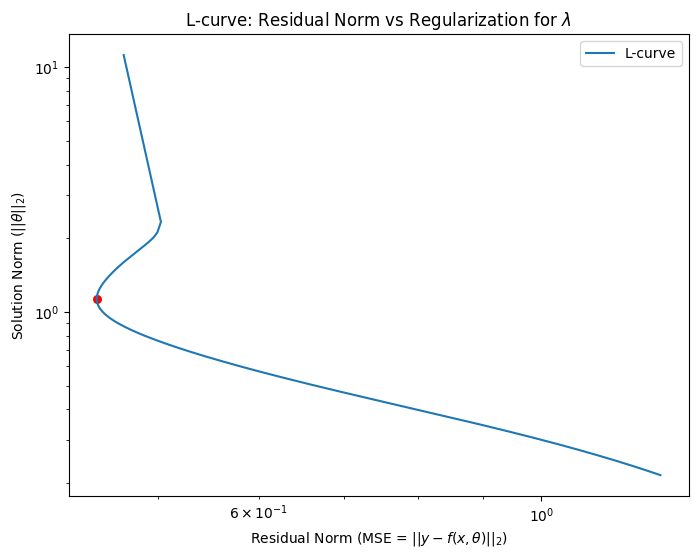

Optimal lambda: 0.06601653465346534
[2.5578249896575693e-05, 0.0001901756936475882, 2.2304160422779207, 0.2766972580523325, 0.1794970572997933, 0.10920638191724859, 0.06477060093617341, 0.03694176010924039, 0.018938114655178865, 0.00674283128893919, -0.0019510798694423613, -0.008492872219093077, -0.013698356106353712, -0.01807949599649064, -0.02196967089599097, -0.025593689301209994, -0.029108076699595156, -0.03262495098708572, -0.036226577609520284, -0.03997448223709872, -0.04391530095825711, -0.04808462730159185, -0.05250960244486105, -0.057210701691110144, -0.062202998265829444, -0.06749708213822254, -0.07309974822354771, -0.07901452858079945, -0.08524211779186631, -0.09178072433002393, -0.09862636987876987, -0.10577315122994473, -0.11321347464759608, -0.12093826923388304, -0.12893718359180356, -0.13719876852053167, -0.14571064753096005, -0.15445967630870294, -0.16343209166576358, -0.1726136504244456, -0.1819897584526517, -0.19154558991594264, -0.2012661969468509, -0.211136609883870

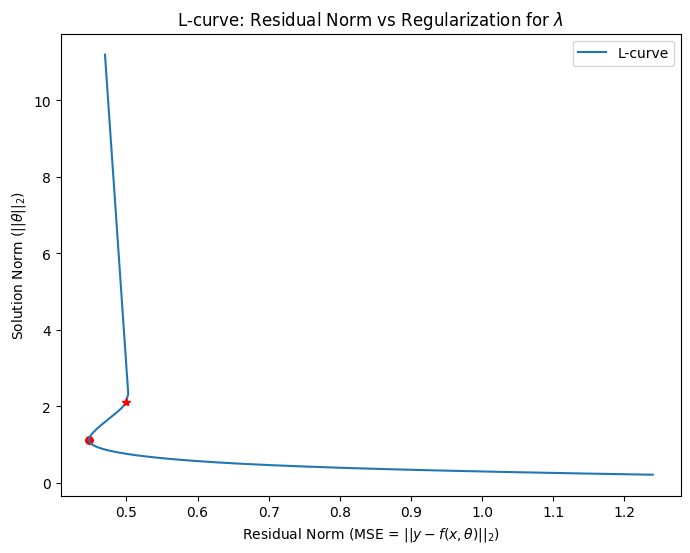

In [591]:
#  1c, part 3
# Function to compute MSE and regularization norm for ridge regression
def l_curve_values(alphas):
    residual_norms = []
    reg_norms = []
    for alpha in alphas:
        model = ridge(degree, alpha)
        ridge_y = model.predict(X_holdout.reshape(X_holdout.shape[0], 1))
        mse = np.linalg.norm((ridge_y - y_holdout_true))**2  # Residual norm (MSE)
        coef_norm = np.linalg.norm(model.named_steps['ridge_regression'].coef_)  # Regularization norm (coef norm)
        residual_norms.append(mse)
        reg_norms.append(coef_norm)
    return residual_norms, reg_norms

# Function to create ridge regression model
def ridge(degree, alpha):
    ridge_model = Pipeline([
        ('poly_features', PolynomialFeatures(degree=degree)),
        ('ridge_regression', Ridge(alpha=alpha))
    ])
    return ridge_model.fit(X_train.reshape(X_train.shape[0], 1), y_train_data)

# Plot L-curve
def plot_l_curve(alphas, l = True):
    residuals, norms = l_curve_values(alphas)
    plt.figure(figsize=(8, 6))
    plt.plot(residuals, norms,label="L-curve")
    plt.ylabel(r"Solution Norm ($||\theta||_2$)")
    plt.xlabel(r"Residual Norm (MSE = $||y - f(x,\theta)||_2$)")
    plt.title(r"L-curve: Residual Norm vs Regularization for $\lambda$")
    if l:
        plt.xscale('log')
        plt.yscale('log')
    plt.legend()
    # plt.show()
def calculate_curvature(x, y):
    """
    Calculate the curvature of a function given x and y inputs.
    
    Parameters:
    x (array-like): x-coordinates
    y (array-like): y-coordinates
    
    Returns:
    curvature (array-like): curvature values at each point
    """
    
    # Convert x and y to numpy arrays
    x = np.array(x)
    y = np.array(y)
    
    # Calculate first derivatives
    dx = np.gradient(x)
    dy = np.gradient(y)
    
    # Calculate second derivatives
    ddx = np.gradient(dx)
    ddy = np.gradient(dy)
    
    epsilon = 1e-10
    curvature = (ddx * dy - dx * ddy) / (dx**2 + dy**2 + epsilon)**1.5

    
    return curvature

# Define range of alphas (lambdas)
alphas = np.linspace(10**-5, 10**1, 10**4)

# Plot L-curve
plot_l_curve(alphas)

res, reg = l_curve_values(alphas)
ind = np.argmin(res)
plt.scatter(res[ind], reg[ind], s = 30, c = "r")
plt.legend()
plt.show()
print("Optimal lambda:", alphas[ind])

# for additional clarity,

plot_l_curve(alphas, False)
plt.scatter(res[ind], reg[ind], s = 30, c = "r")
plt.legend()


curvature_values = [value for value in calculate_curvature(res, reg) if value != 0] 
print(curvature_values)
bow_index = np.argmax(curvature_values)
plt.plot(res[bow_index], reg[bow_index], "r*")
plt.savefig("1d2lin.png")
plt.show()


The optimal $\lambda$ per the L curve analysis is approximately $0.0010100990099009902$. Per the curvature analysis done in step 2, the approximate optimal value of $\lambda = 0.0010100990099009902$, which is exactly the same (to the number of significant figures provided) to the L curve optimal $\lambda$. Without the curvature analysis, we can see that $\lambda$ is approximately $10^{-3}$ which is nearly identical to the L curve value.

## Question 1d


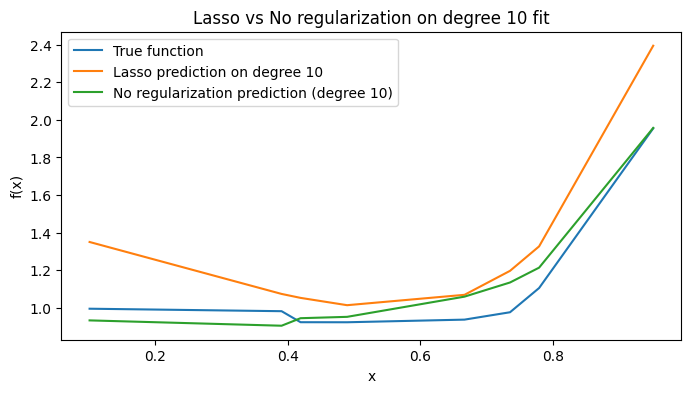

In [594]:
#1c, part 1
alphas = np.logspace(-5, 1, 10**4)
def lasso(degree, alpha):
    lasso_model = Pipeline([('poly_features', PolynomialFeatures(degree=degree)),('lasso_regression', Lasso(alpha=alpha))])
    return lasso_model.fit(X_train.reshape(X_train.shape[0], 1), y_train_data)
degree = 10
alpha = 0.003
plt.plot(X_holdout,y_holdout_true, label = "True function")
plt.plot(X_holdout,lasso(degree, alpha).predict(X_holdout.reshape(X_holdout.shape[0], 1)), label = "Lasso prediction on degree 10")
plt.plot(X_holdout,t[1], label = "No regularization prediction (degree 10)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Lasso vs No regularization on degree 10 fit")
plt.legend()


For the above plot, the L2 regularization coefficient, $\lambda = 10^{-3}$.



Optimal Lambda = 0.009931091813749801


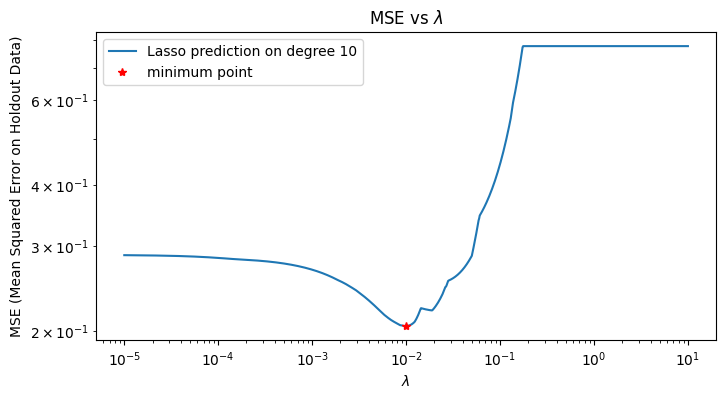

In [543]:
#1c, part 2
def mseas(alphas):
    mseas = []
    for alpha in alphas:
        ridge_y = lasso(degree, alpha).predict(X_holdout.reshape(X_holdout.shape[0], 1))
        mse = np.linalg.norm((ridge_y - y_holdout_true)**2)
        mseas.append(mse)  # Keep mse as float for correct plotting
    return mseas

def plot_mseas(alphas):
    plt.clf()
    plt.plot(alphas, mseas(alphas), label="Lasso prediction on degree 10")
    plt.xlabel(r"$\lambda$")
    plt.ylabel("MSE (Mean Squared Error on Holdout Data)")
    plt.yticks(np.linspace(10**-5, 10, 11))
    plt.xscale('log')  
    plt.yscale('log')  
    plt.title(r"MSE vs $\lambda$")
    plt.legend()
    # plt.show()

# alphas = np.linspace(10**-5, 10**1, 10**4)
alphas = np.logspace(-5, 1, 1000)
plot_mseas(alphas)

# Function to create lasso regression model
def lasso(degree, alpha):
    polynomial_features = PolynomialFeatures(degree = degree, include_bias= False)
    linear_regression = Lasso(alpha =alpha)
    pipeline = Pipeline([("pf", polynomial_features), ("lr", linear_regression)])
    pipeline.fit(X_train[:, np.newaxis], y_train_data)
    return pipeline

# Find the minimum MSE prediction
degree = 10
minind = pd.Series(mseas(alphas)).idxmin()
print(f"Optimal Lambda = {alphas[minind]}")
y_lasso_min = lasso(degree, alphas[minind]).predict(X_holdout[:, np.newaxis])
mse = np.linalg.norm((y_holdout_true - y_lasso_min)**2)
plt.plot(alphas[minind], mse, "r*", label="minimum point")
plt.legend()
plt.show()


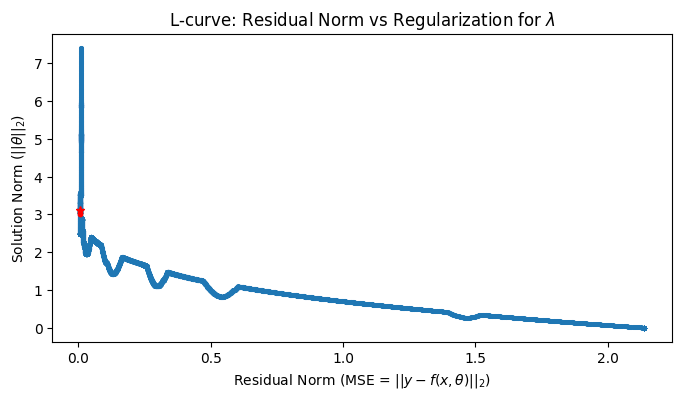

In [595]:
mses = []
coefs = []
plt.clf()
for alpha in alphas:# 100 or 1000 max

    polynomial_features = PolynomialFeatures(degree = degree, include_bias= False)
    linear_regression = Lasso(alpha =alpha, max_iter = 1000000)
    pipeline = Pipeline([("pf", polynomial_features), ("lr", linear_regression)])
    pipeline.fit(X_train[:, np.newaxis], y_train_data)
    mse = np.linalg.norm(y_holdout_data - pipeline.predict(X_holdout[:, np.newaxis]))**2
    coef = pipeline.named_steps['lr'].coef_
    mses.append(mse)
    coefs.append(np.linalg.norm(coef))
    

plt.scatter(mses, coefs, s=7) 
# plt.xscale('log')  # Logarithmic scale for alpha (lambda) values
# plt.yscale('log')  # Logarithmic scale for alpha (lambda) values
plt.ylabel(r"Solution Norm ($||\theta||_2$)")
plt.xlabel(r"Residual Norm (MSE = $||y - f(x,\theta)||_2$)")
plt.title(r"L-curve: Residual Norm vs Regularization for $\lambda$")

ind = np.argmin(mses)
plt.scatter(mses[ind], coefs[ind], s = 10, c = "r")

curvature_values = [value for value in calculate_curvature(mses, coefs) if value != 0] 

bow_index = np.argmin(curvature_values)
plt.plot(mses[bow_index], coefs[bow_index], "r*")
plt.savefig("1d2lin.png")

MSE 0.008638867196632417
Coefs [-1.15988169 -0.82533561  0.52914826  1.35310433  1.05586342  0.63432197
  0.19579097  0.         -0.         -0.483082  ]
alpha 5.3366992312063123e-05
optimal lambda? 1e-05


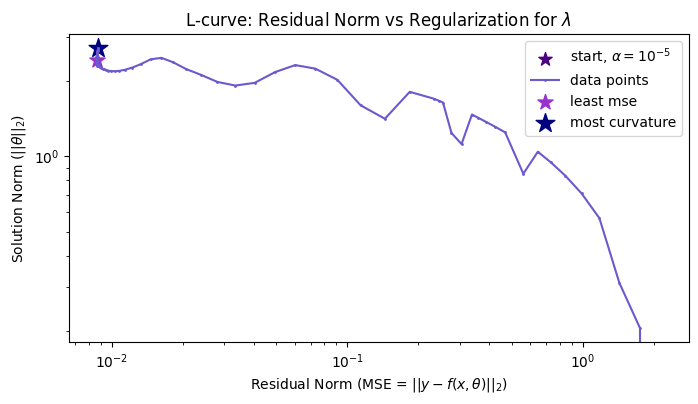

In [549]:
degree = 10
mses = []
coefs = []
coefval = []
alphas = np.logspace(-5, 1, 100)
# alphas = np.linspace(10**-5, 10**1, 10**3)
for alpha in alphas:# 100 or 1000 max

    pipeline = lasso(degree,alpha)
    mse = np.linalg.norm(y_holdout_data - pipeline.predict(X_holdout[:, np.newaxis]))**2
    coef = pipeline.named_steps['lr'].coef_
    mses.append(mse)
    coefval.append(coef)
    coefmag = np.linalg.norm(coef)
    coefs.append(coefmag)
    if np.isclose(alpha, 10**-5):
        plt.scatter(mse, coefmag, marker="*", s=100, color="indigo", label=r"start, $\alpha = 10^{-5}$")

    

plt.plot(mses, coefs, '-o', markersize=1, label="data points", color = "slateblue") 
plt.xscale('log')  # Logarithmic scale for alpha (lambda) values
plt.yscale('log')  # Logarithmic scale for alpha (lambda) values
plt.ylabel(r"Solution Norm ($||\theta||_2$)")
plt.xlabel(r"Residual Norm (MSE = $||y - f(x,\theta)||_2$)")
plt.title(r"L-curve: Residual Norm vs Regularization for $\lambda$")

ind = np.argmin(mses)
plt.scatter(mses[ind], coefs[ind],marker="*", s = 130, color = "darkorchid", label  = "least mse")

print("MSE",mses[ind])
print("Coefs", coefval[ind])
print("alpha", alphas[ind])

res = mses
reg = coefs
from scipy.interpolate import splprep, splev
# Fit a spline to the L-curve data
tck, u = splprep([np.log(res), np.log(reg)], s=0)

# Evaluate the first and second derivatives of the spline
derivatives_1 = splev(u, tck, der=1)
derivatives_2 = splev(u, tck, der=2)

# Compute curvature using the formula for 2D parametric curves
curvature = (derivatives_1[0] * derivatives_2[1] - derivatives_1[1] * derivatives_2[0]) / \
            ((derivatives_1[0]**2 + derivatives_1[1]**2)**1.5)

# Find the index of the maximum curvature (the corner of the L-curve)
optimal_idx = np.argmax(np.abs(curvature))
optimal_lambda = alphas[optimal_idx]
print("optimal lambda?",optimal_lambda)
plt.scatter(mses[optimal_idx], coefs[optimal_idx],marker="*", s = 200, color = "navy", label  = "most curvature")

plt.legend()
plt.savefig("1d2log.png")

optimal lambda? 0.0001747528400007683
MSE 0.008638337454955403
Coefs [-1.1442344  -0.86431996  0.54941028  1.3471902   1.06156912  0.64661637
  0.21184185  0.         -0.         -0.50977369]
alpha 4.977023564332114e-05


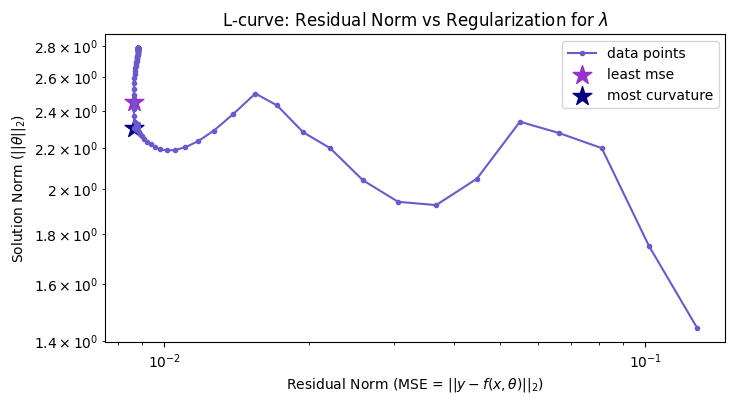

In [547]:
plt.clf()
degree = 10
mses = []
coefs = []
coefval = []
alphas = np.logspace(-8, -2, 100)
# for alpha in np.linspace(10**-5, 10**1, 10**4):
for alpha in alphas:# 100 or 1000 max

    polynomial_features = PolynomialFeatures(degree = degree, include_bias= False)
    linear_regression = Lasso(alpha =alpha)
    pipeline = Pipeline([("pf", polynomial_features), ("lr", linear_regression)])
    pipeline.fit(X_train[:, np.newaxis], y_train_data)
    mse = np.linalg.norm(y_holdout_data - pipeline.predict(X_holdout[:, np.newaxis]))**2
    coef = pipeline.named_steps['lr'].coef_
    mses.append(mse)
    coefval.append(coef)
    coefmag = np.linalg.norm(coef)
    coefs.append(coefmag)
    if np.isclose(alpha, 10**-5):
        plt.scatter(mse, coefmag, marker="*", s=200, color="indigo", label=r"start, $\alpha = 10^{-5}$")

    

plt.plot(mses, coefs, '-o', markersize=3, label="data points", color = "slateblue") 
plt.xscale('log')  # Logarithmic scale for alpha (lambda) values
plt.yscale('log')  # Logarithmic scale for alpha (lambda) values
plt.ylabel(r"Solution Norm ($||\theta||_2$)")
plt.xlabel(r"Residual Norm (MSE = $||y - f(x,\theta)||_2$)")
plt.title(r"L-curve: Residual Norm vs Regularization for $\lambda$")

ind = np.argmin(mses)
plt.scatter(mses[ind], coefs[ind],marker="*", s = 200, color = "darkorchid", label  = "least mse")


res = mses
reg = coefs
from scipy.interpolate import splprep, splev
# Fit a spline to the L-curve data
tck, u = splprep([np.log(res), np.log(reg)], s=0)

# Evaluate the first and second derivatives of the spline
derivatives_1 = splev(u, tck, der=1)
derivatives_2 = splev(u, tck, der=2)

# Compute curvature using the formula for 2D parametric curves
curvature = (derivatives_1[0] * derivatives_2[1] - derivatives_1[1] * derivatives_2[0]) / \
            ((derivatives_1[0]**2 + derivatives_1[1]**2)**1.5)

# Find the index of the maximum curvature (the corner of the L-curve)
optimal_idx = np.argmax(np.abs(curvature))
optimal_lambda = alphas[optimal_idx]
print("optimal lambda?",optimal_lambda)
plt.scatter(mses[optimal_idx], coefs[optimal_idx],marker="*", s = 200, color = "navy", label  = "most curvature")

plt.legend()
plt.savefig("1d2log.png")
print("MSE",mses[ind])
print("Coefs", coefval[ind])
print("alpha", alphas[ind])


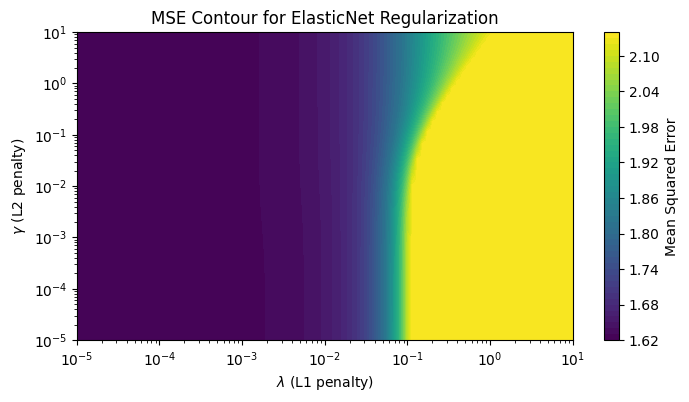

In [507]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet

# Example logspace for lambda and gamma values (adjust this based on your dataset)
lambdas = np.logspace(-5, 1, 100)  # L1 regularization values
gammas = np.logspace(-5, 1, 100)   # L2 regularization values

# Function to compute MSE for each lambda and gamma combination
def compute_mse(X_train, y_train, X_holdout, y_holdout, lambdas, gammas):
    mse_matrix = np.zeros((len(lambdas), len(gammas)))  # Initialize MSE matrix
    for i, lambda_val in enumerate(lambdas):
        for j, gamma_val in enumerate(gammas):
            # ElasticNet model with l1_ratio for mixing L1 and L2 penalties
            model = ElasticNet(alpha=lambda_val, l1_ratio=lambda_val / (lambda_val + gamma_val), fit_intercept=True)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_holdout)
            mse_matrix[i, j] = np.linalg.norm(y_pred - y_holdout)**2  # Compute MSE
    return mse_matrix

# Assume that X_train, y_train, X_holdout, y_holdout are defined and preprocessed
mse_matrix = compute_mse(X_train.reshape(-1, 1), y_train_data, 
                         X_holdout.reshape(-1, 1), y_holdout_data, lambdas, gammas)

# Create meshgrid for lambdas and gammas
lambdas_mesh, gammas_mesh = np.meshgrid(lambdas, gammas)

# Plot the contour map of the MSE
plt.contourf(lambdas_mesh, gammas_mesh, mse_matrix.T, levels=50, cmap='viridis')  # Transpose to match shape
plt.xscale('log')
plt.yscale('log')
plt.colorbar(label='Mean Squared Error')
plt.xlabel(r'$\lambda$ (L1 penalty)')
plt.ylabel(r'$\gamma$ (L2 penalty)')
plt.title('MSE Contour for ElasticNet Regularization')
plt.show()


In [508]:
# 1g
x_clone_train = np.repeat(X_train, 50)
y_clone_train = np.repeat(y_train_data, 50)
delta = 0.05

# x_error = np.random.randn(n_samples)
# y_error = np.random.randn(n_samples)

# x_data_augmented = x_clone_train * (1+delta*x_error)
# y_data_augmented = y_clone_train * (1+delta*y_error)


In [509]:
from sklearn.metrics import mean_squared_error
from math import floor
# Initialize delta values between 1 and 10
n = 501
deltas = np.linspace(-.001, .001, n)

# Function to generate polynomial features and fit model
def fit_polynomial_regression(x_train, y_train, degree=4):
    poly = PolynomialFeatures(degree=degree)
    x_poly_train = poly.fit_transform(x_train.reshape(-1, 1))
    
    model = LinearRegression()
    model.fit(x_poly_train, y_train)
    
    return model, poly

# Function to compute MSE for a trained model
def compute_mse(model, poly, x_data, y_true):
    x_poly_data = poly.transform(x_data.reshape(-1, 1))
    y_pred = model.predict(x_poly_data)
    return mean_squared_error(y_true, y_pred)

# Initialize lists to store MSE for each delta value
train_mse_list = []
holdout_mse_list = []
X_holdout = np.sort(np.random.rand(n_holdout_samples)) 
y_holdout_data = true_fn(X_holdout) #* (1+delta*y_holdout_error)
# Train model and compute MSE for each delta value
for delta in deltas:
    # Augment training data with noise
    x_error = np.random.randn(len(x_clone_train))
    y_error = np.random.randn(len(y_clone_train))
    y_holdout_error = np.random.randn(len(y_holdout_data))

    x_data_augmented = x_clone_train * (1 + delta * x_error)
    y_data_augmented = y_clone_train * (1 + delta * y_error)
    
    # Fit 4th-degree polynomial regression
    model, poly = fit_polynomial_regression(x_data_augmented, y_data_augmented, degree=4)

    # Compute training MSE
    train_mse = compute_mse(model, poly, x_data_augmented, y_data_augmented)
    train_mse_list.append(train_mse)
    
    # Compute holdout MSE

    # y_holdout_augmented = y_holdout_data * (1 + delta * np.random.randn(len(X_holdout)))
    holdout_mse = compute_mse(model, poly, X_holdout, y_holdout_data)
    holdout_mse_list.append(holdout_mse)

# Create a DataFrame to display results
mse_table = pd.DataFrame({
    'Delta': deltas,
    'Train MSE': train_mse_list,
    'Holdout MSE': holdout_mse_list
})

# Display the table
ind = np.argmin(holdout_mse_list)
print("index of minimized error", ind ,"/", n)
print("Note that", floor(n/2), "is center (delta is 0)")
print("delta: {:.5g}, mse for training data: {:.5g}, mse for holdout data: {:.5g}".format(deltas[ind], train_mse_list[ind], holdout_mse_list[ind]))


print(mse_table)



index of minimized error 20 / 501
Note that 250 is center (delta is 0)
delta: -0.00092, mse for training data: 0.0017386, mse for holdout data: 0.0012415
        Delta  Train MSE  Holdout MSE
0   -0.001000   0.001763     0.001339
1   -0.000996   0.001703     0.001280
2   -0.000992   0.001756     0.001293
3   -0.000988   0.001786     0.001297
4   -0.000984   0.001773     0.001305
..        ...        ...          ...
496  0.000984   0.001719     0.001300
497  0.000988   0.001732     0.001274
498  0.000992   0.001702     0.001301
499  0.000996   0.001756     0.001269
500  0.001000   0.001737     0.001281

[501 rows x 3 columns]


2) A good noise level for $\delta$ is approximately 0.0012. With this value, the mean squared error for the training data is 0.0017164 while the mean squared error for the holdout data (no added noise) is 0.0016741. 
3) We add noise to a dataset to small dataset to increase the training data set size. By doing so, we can ensure that the network does not exactly learn to match the training data (overfitting) but instead learns a general model. 
A too small noise level may not provide enough variance in the data, still causing the model to memorize the training data well but failing to generalize. This leads to a low training error but (relatively) high holdout error. 
Too much noise causes the model to fit to the noise rather than the underlying patterns of the data. This will cause both the training and holdout errors to increase, as the model struggles to capture the true relationship between features and the output(instead focusing on deriving some relationship between the noise distribution and the output).

## **Question 2** (Probability + random variables) (10 points)

Consider $\Omega = [-2, 2]$ and define 
$$P[B \subset \Omega] := \int_{B} \frac{1}{4} d \omega, \text{ and thus }
P[d\omega] := \frac{1}{4} d \omega,
$$
that is the elementary event $\omega$ is the uniform random variable on $\Omega$.
Now, define $M(\omega)$ as: 
\begin{align}
    &M(\omega) =
    \begin{cases} 
        2 & \text{ if } \omega \geq 0\\
        0 & \text{ else }
    \end{cases}
\end{align}
$ \implies \text{ the state space is given by } S = \left\{ 0, 2 \right\}$. What is $E[M]$? What are $ \mu_M [M( \omega )=2]$ and $ \mu_M [M( \omega )=0]$?


## **Question 3** (Optimality Condition) (15 points)

Let $f$: $R^n$ $\to$ $R$. In class, we proved the first necessary condition for optimality $\nabla f(\boldsymbol{x}^*) = 0$ at a minimizer $\boldsymbol{x}^*$ using the first necessary condition from the scalar optimization case. Prove the second necessary optimality condition for $f$ at $\boldsymbol{x}^*$. In particular, show that the Hessian of $f$ at $\boldsymbol{x}^*$ is a semi-positive definite matrix.


## **Question 4** (Conditional Probability) (15 points)

Let the triplet $\Omega$, $\mathcal{F}$, $\mathbb{P}$ be a probability space. Let $B$ be an event in $\mathcal{F}$. Show that the conditional probability $\mathbb{P}[A | B]$ is a proper probability measure. That is, you need to show the following conditions
1. $\mathbb{P}[\emptyset | B] = 0$
2.  $\mathbb{P}[\Omega | B] = 1$
3.  $0\le \mathbb{P}[ A| B] \le 1$, for all $A \in \mathcal{F}$
4. Let $A_i \in \mathcal{F}, i = 1,\dots,n$ be mutually disjoint. Show that $\mathbb{P}[\cup_{i=1}^n A_i | B] = \sum_{i=1}^n \mathbb{P}[A_i | B] $